In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

In [3]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
117,0,2,male,29.0,1,0,21.000,S
542,0,3,female,11.0,4,2,31.275,S
634,0,3,female,9.0,3,2,27.900,S
397,0,2,male,46.0,0,0,26.000,S


In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

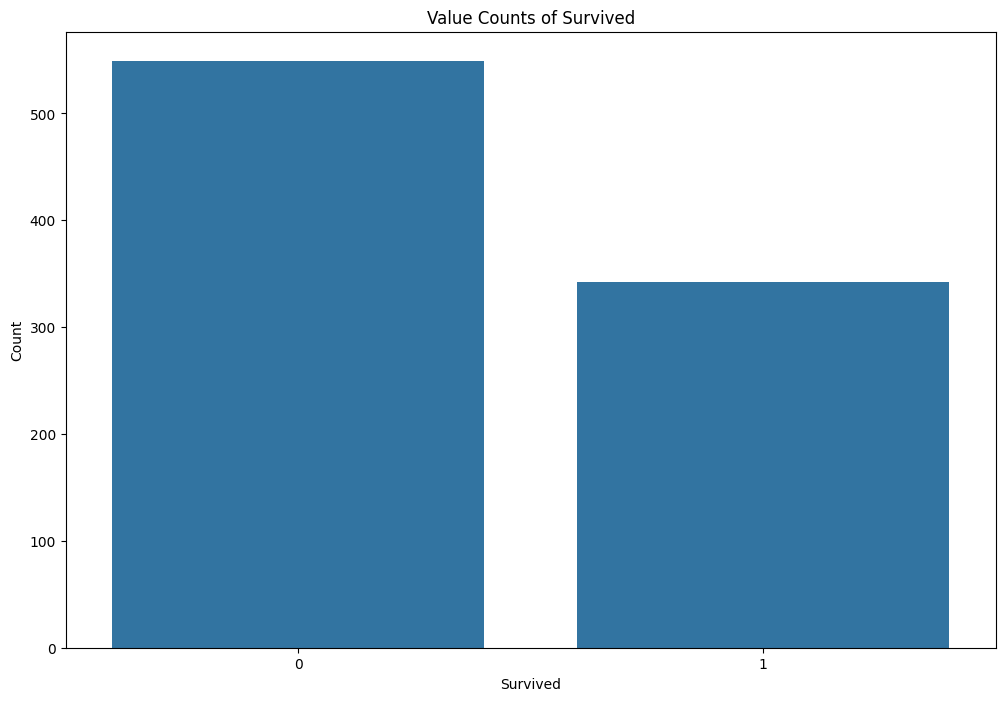

In [5]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

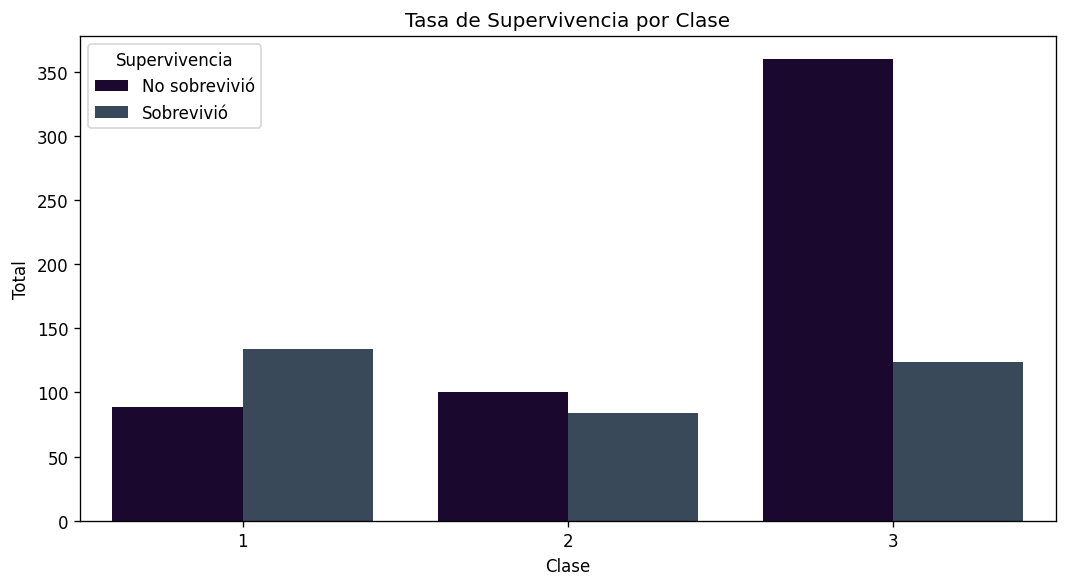

In [6]:

# Datos exactos
datos = pd.DataFrame({
    "Clase": [1, 1, 2, 2, 3, 3],
    "Supervivencia": ["No sobrevivió", "Sobrevivió",
                      "No sobrevivió", "Sobrevivió",
                      "No sobrevivió", "Sobrevivió"],
    "Total": [89, 134, 100, 84, 360, 124]
})

plt.figure(figsize=(9,5), dpi=120)
ax = sns.barplot(
    data=datos,
    x="Clase", y="Total",
    hue="Supervivencia",
    hue_order=["No sobrevivió", "Sobrevivió"],
    palette=["#1B0136", "#34495E"],   # mismos colores
    dodge=True                        # barras lado a lado
)

ax.set_title("Tasa de Supervivencia por Clase")
ax.set_xlabel("Clase")
ax.set_ylabel("Total")
ax.legend(title="Supervivencia", loc="upper left", frameon=True)
plt.tight_layout()
plt.show()




Survived  No sobrevivió  Sobrevivió
Sex                                
female               81         233
male                468         109


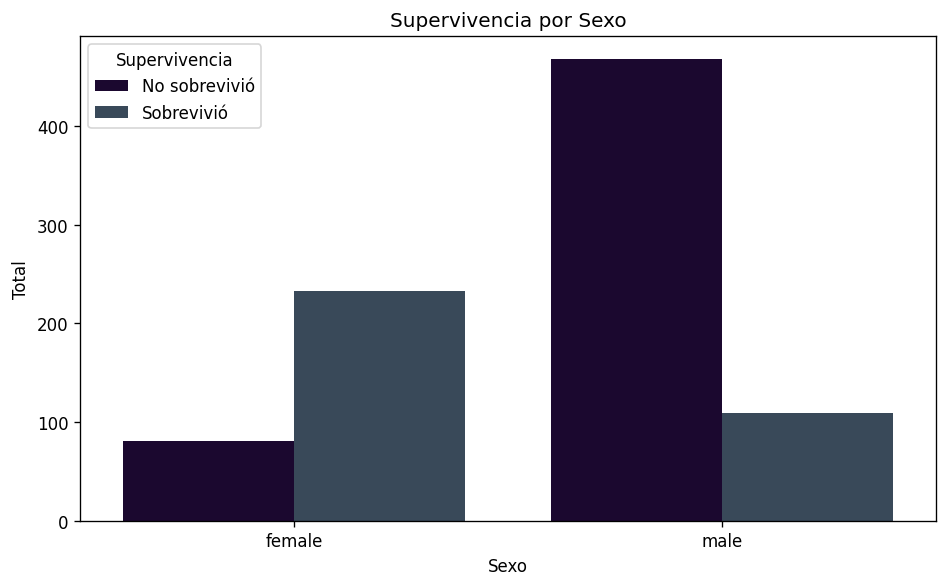

In [7]:
# Si ya tienes tu DataFrame completo como `df` con columnas: Survived (0/1) y Sex
# 1) Tabla de contingencia (conteos)
tabla = pd.crosstab(df['Sex'], df['Survived']).rename(columns={0:'No sobrevivió', 1:'Sobrevivió'})
print(tabla)

# 2) Preparar datos en formato largo para seaborn
plot_df = tabla.reset_index().melt(id_vars='Sex', var_name='Supervivencia', value_name='Total')

# 3) Gráfica: barras agrupadas por sexo
plt.figure(figsize=(8,5), dpi=120)
ax = sns.barplot(
    data=plot_df,
    x='Sex', y='Total',
    hue='Supervivencia',
    hue_order=['No sobrevivió','Sobrevivió'],
    palette=['#1B0136','#34495E'],   # mismos colores de antes
    dodge=True
)

ax.set_title('Supervivencia por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Total')
ax.legend(title='Supervivencia', loc='upper left', frameon=True)
plt.tight_layout()
plt.show()


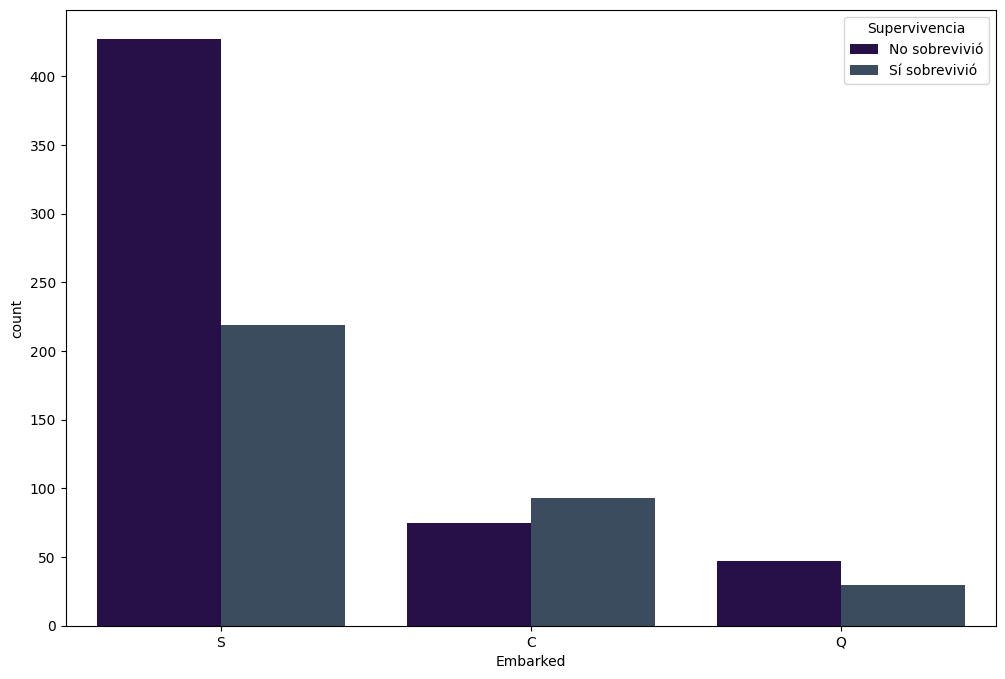

In [8]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

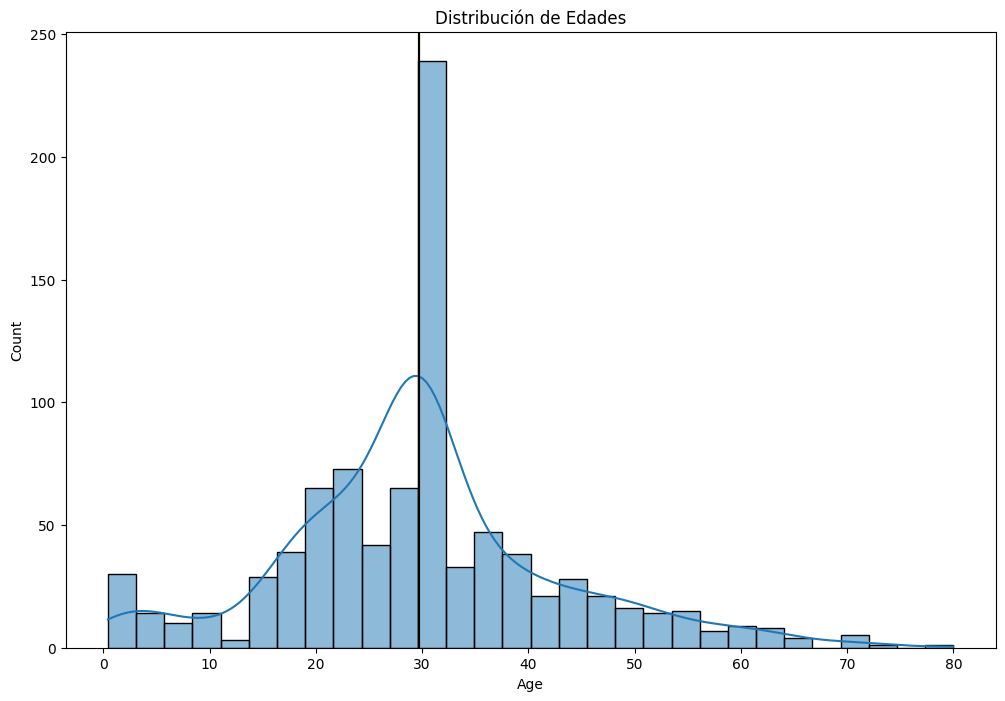

Media: 29.69911764705882
Mediana: 29.69911764705882
Moda: 29.69911764705882


In [9]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

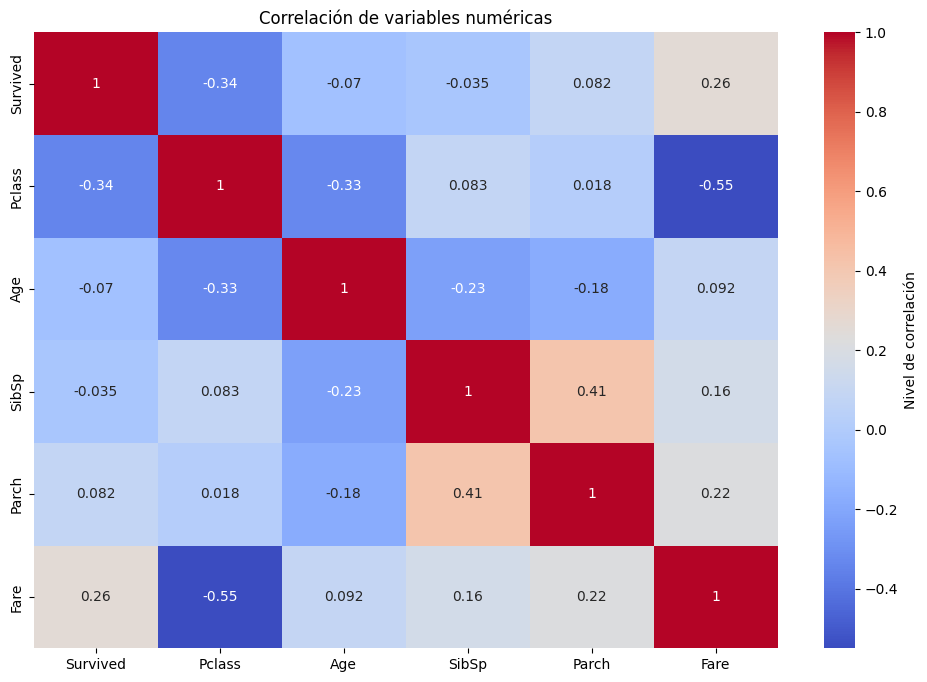

In [12]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

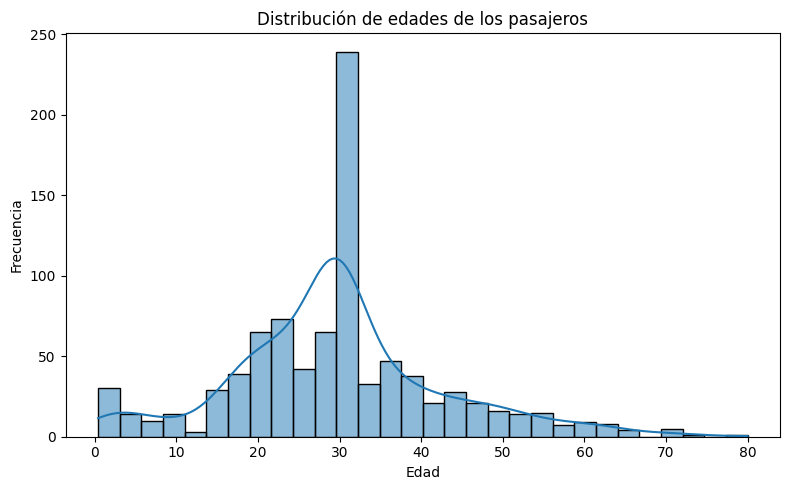

In [13]:

# 1) Histograma + KDE (suave)
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de edades de los pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


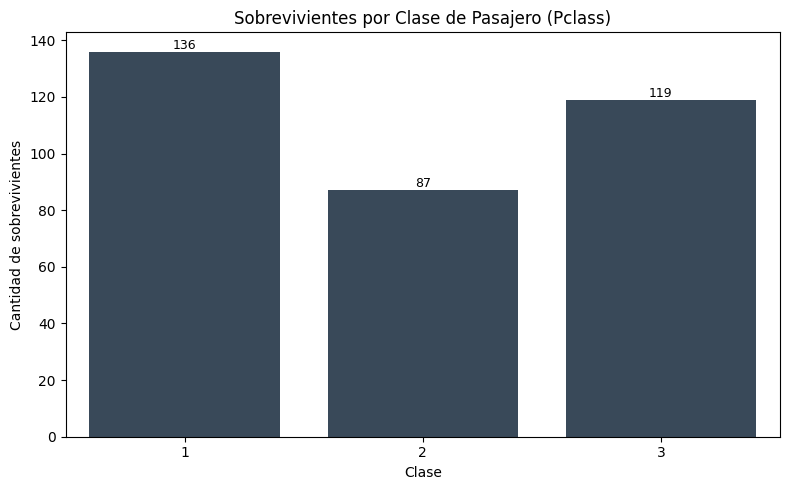

In [14]:
# Conteo de sobrevivientes (Survived==1) por clase
survivors_by_class = (
    df.groupby('Pclass')['Survived']
      .sum()                     # si Survived es 0/1, la suma = # de sobrevivientes
      .reindex([1, 2, 3])        # asegurar orden de clases
      .fillna(0)
      .astype(int)
)

# Pasar a DataFrame para seaborn
plot_df = survivors_by_class.reset_index(name='Sobrevivientes')

plt.figure(figsize=(8,5))
ax = sns.barplot(data=plot_df, x='Pclass', y='Sobrevivientes', color='#34495E')
ax.set_title('Sobrevivientes por Clase de Pasajero (Pclass)')
ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad de sobrevivientes')

# Anotar valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


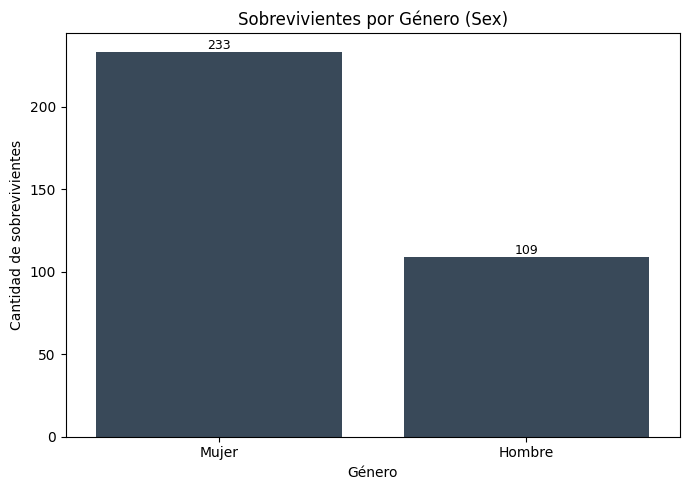

In [15]:

# Conteo de sobrevivientes (Survived==1) por género
survivors_by_sex = (
    df.groupby('Sex')['Survived']
      .sum()               # si Survived es 0/1, la suma = # de sobrevivientes
      .reindex(['female','male'])  # orden consistente
      .fillna(0)
      .astype(int)
)

plot_df = survivors_by_sex.reset_index(name='Sobrevivientes')
plot_df['Sexo'] = plot_df['Sex'].map({'female':'Mujer', 'male':'Hombre'})

plt.figure(figsize=(7,5))
ax = sns.barplot(data=plot_df, x='Sexo', y='Sobrevivientes', color='#34495E')

ax.set_title('Sobrevivientes por Género (Sex)')
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de sobrevivientes')

# Anotar valores
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


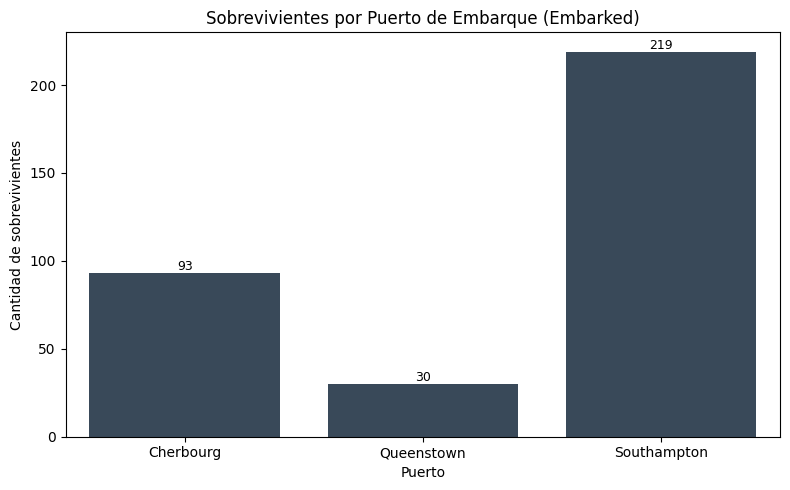

In [16]:
# Copia y limpia puerto faltante
tmp = df.copy()
tmp['Embarked'] = tmp['Embarked'].fillna('Desconocido')

# Conteo de sobrevivientes (Survived==1) por puerto
survivors_by_port = (
    tmp.groupby('Embarked')['Survived']
       .sum()  # si Survived es 0/1, la suma = # de sobrevivientes
)

# Orden habitual + 'Desconocido' al final si existe
orden = [p for p in ['C','Q','S','Desconocido'] if p in survivors_by_port.index]
plot_df = survivors_by_port.reindex(orden).reset_index(name='Sobrevivientes')

# Etiquetas legibles
nombre_puerto = {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton', 'Desconocido':'Desconocido'}
plot_df['Puerto'] = plot_df['Embarked'].map(nombre_puerto)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=plot_df, x='Puerto', y='Sobrevivientes', color='#34495E')

ax.set_title('Sobrevivientes por Puerto de Embarque (Embarked)')
ax.set_xlabel('Puerto')
ax.set_ylabel('Cantidad de sobrevivientes')

# Anotar valores
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\Guych\AppData\Local\Temp\ipykernel_7504\2346916692.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa = (df_edad.groupby('GrupoEdad')['Survived']


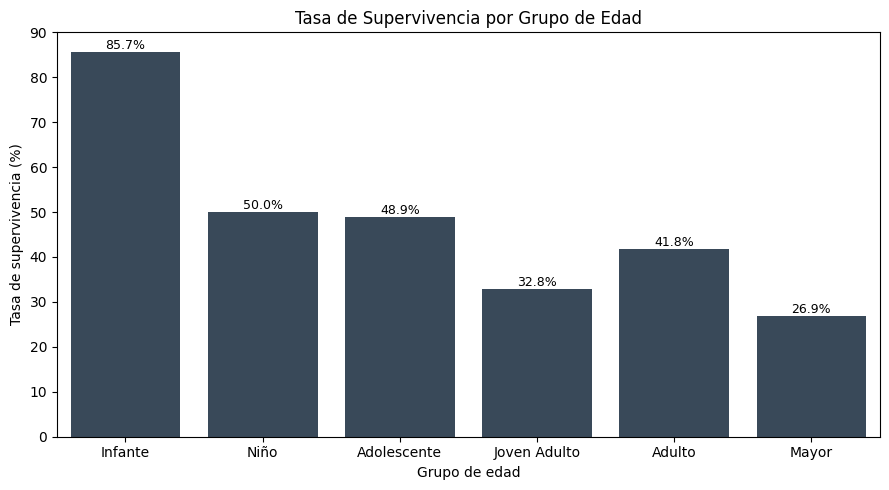

In [17]:
# 1) Definir grupos de edad (ajusta si tu curso usa otros cortes)
bins   = [-0.1, 2, 12, 18, 30, 60, 200]   # límites (años)
labels = ['Infante','Niño','Adolescente','Joven Adulto','Adulto','Mayor']

df_edad = df.copy()
df_edad = df_edad.dropna(subset=['Age'])             # excluir edades faltantes para tasa
df_edad['GrupoEdad'] = pd.cut(df_edad['Age'], bins=bins, labels=labels, right=False)

# 2) Tasa de supervivencia por grupo (Survived es 0/1 → media = proporción de 1s)
tasa = (df_edad.groupby('GrupoEdad')['Survived']
               .mean()
               .reindex(labels))                     # asegurar orden definido

plot_df = (tasa * 100).reset_index(name='TasaSupervivencia_%')

# 3) Gráfica
plt.figure(figsize=(9,5))
ax = sns.barplot(data=plot_df, x='GrupoEdad', y='TasaSupervivencia_%', color='#34495E')

ax.set_title('Tasa de Supervivencia por Grupo de Edad')
ax.set_xlabel('Grupo de edad')
ax.set_ylabel('Tasa de supervivencia (%)')

# Anotar porcentajes
for p in ax.patches:
    y = p.get_height()
    ax.annotate(f'{y:.1f}%',
                (p.get_x() + p.get_width()/2, y),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


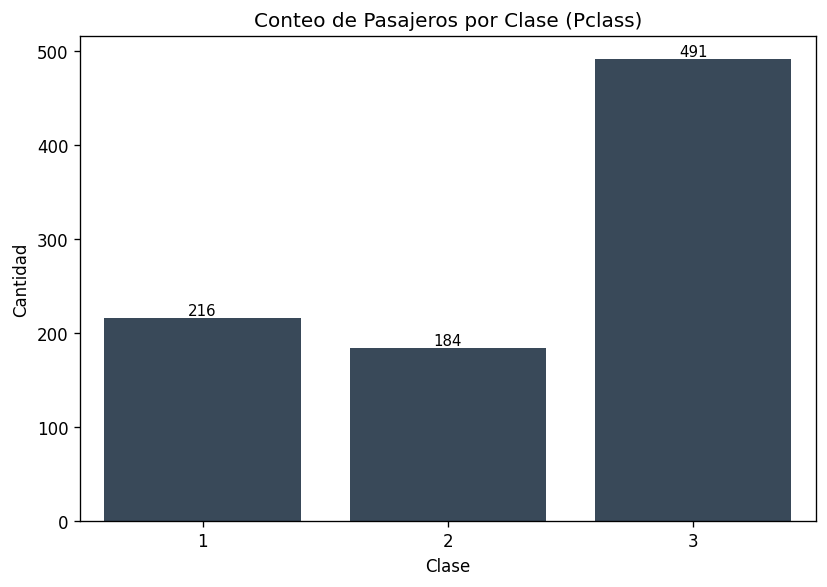

In [18]:

# Conteos por clase (asegurando el orden 1,2,3)
counts = (
    df['Pclass']
    .value_counts(dropna=False)
    .reindex([1, 2, 3])
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(7,5), dpi=120)
ax = sns.countplot(data=df, x='Pclass', order=[1,2,3], color='#34495E')

ax.set_title('Conteo de Pasajeros por Clase (Pclass)')
ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad')

# Anotar valores encima de cada barra
for i, v in enumerate(counts.tolist()):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


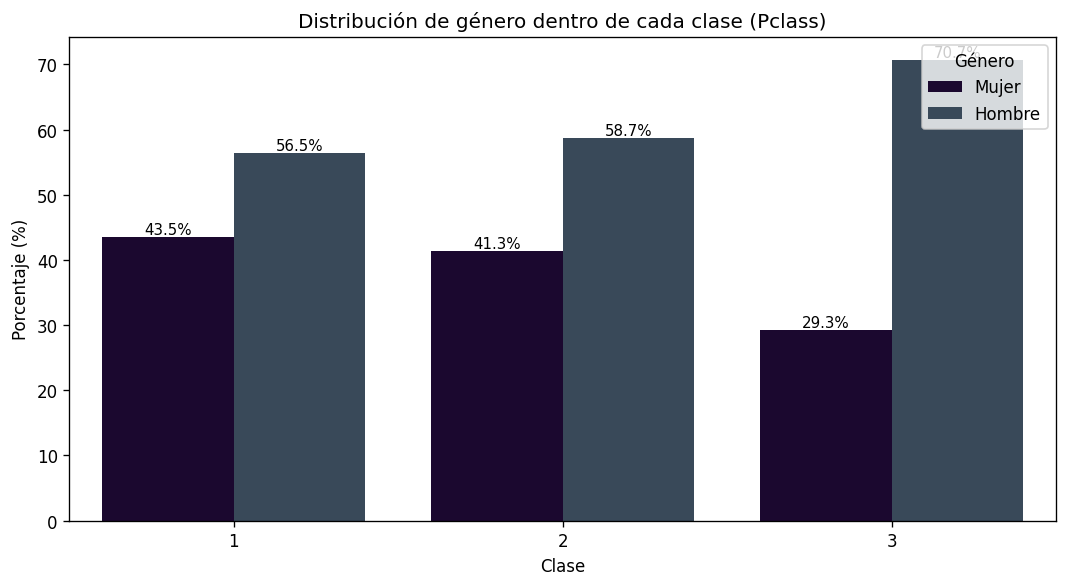

In [19]:
# 1) Proporción (porcentaje) de género dentro de cada clase
#    normalize='index' → cada fila (clase) suma 1
prop = (pd.crosstab(df['Pclass'], df['Sex'], normalize='index')
          .reindex([1,2,3])                # orden de clases
          .rename(columns={'female':'Mujer','male':'Hombre'}))

plot_df = (prop*100).reset_index().melt(id_vars='Pclass',
                                        var_name='Género',
                                        value_name='Porcentaje')

# 2) Barras agrupadas (lado a lado) por clase
plt.figure(figsize=(9,5), dpi=120)
ax = sns.barplot(data=plot_df, x='Pclass', y='Porcentaje',
                 hue='Género',
                 hue_order=['Mujer','Hombre'],
                 palette=['#1B0136','#34495E'], dodge=True)

ax.set_title('Distribución de género dentro de cada clase (Pclass)')
ax.set_xlabel('Clase')
ax.set_ylabel('Porcentaje (%)')
ax.legend(title='Género', loc='upper right', frameon=True)

# Anotar valores
for p in ax.patches:
    y = p.get_height()
    if y > 0:
        ax.annotate(f'{y:.1f}%', (p.get_x()+p.get_width()/2, y),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


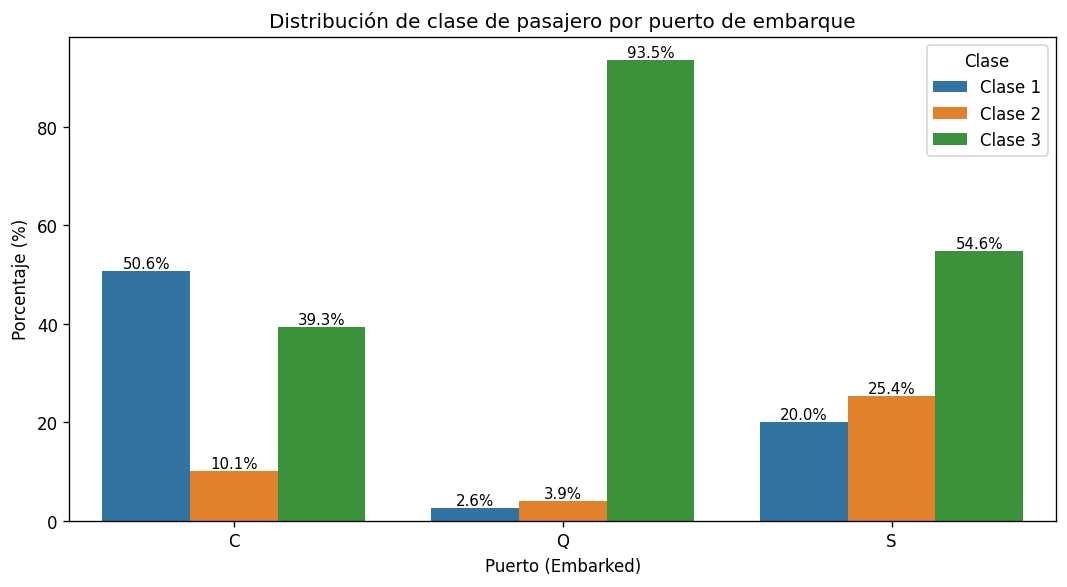

In [20]:
# Opcional: rellenar faltantes
tmp = df.copy()
tmp['Embarked'] = tmp['Embarked'].fillna('Desconocido')

# Proporción de clase dentro de cada puerto (cada puerto suma 100%)
prop = (pd.crosstab(tmp['Embarked'], tmp['Pclass'], normalize='index')
          .rename(columns={1:'Clase 1', 2:'Clase 2', 3:'Clase 3'}))

# Orden de puertos (ajusta si no los tienes todos)
orden_puertos = [p for p in ['C','Q','S','Desconocido'] if p in prop.index]
plot_df = (prop.loc[orden_puertos]*100).reset_index().melt(
    id_vars='Embarked', var_name='Clase', value_name='Porcentaje'
)

plt.figure(figsize=(9,5), dpi=120)
ax = sns.barplot(data=plot_df, x='Embarked', y='Porcentaje',
                 hue='Clase', dodge=True)  # barras lado a lado

ax.set_title('Distribución de clase de pasajero por puerto de embarque')
ax.set_xlabel('Puerto (Embarked)')
ax.set_ylabel('Porcentaje (%)')
ax.legend(title='Clase', frameon=True)

# Anotar valores
for p in ax.patches:
    y = p.get_height()
    if y > 0:
        ax.annotate(f'{y:.1f}%', (p.get_x()+p.get_width()/2, y),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Si prefieres CONTEOS en lugar de porcentajes, usa este bloque en su lugar ---
# counts = pd.crosstab(tmp['Embarked'], tmp['Pclass']).rename(columns={1:'Clase 1',2:'Clase 2',3:'Clase 3'})
# plot_counts = counts.loc[orden_puertos].reset_index().melt(id_vars='Embarked', var_name='Clase', value_name='Total')
# sns.barplot(data=plot_counts, x='Embarked', y='Total', hue='Clase', dodge=True)


C:\Users\Guych\AppData\Local\Temp\ipykernel_7504\3563856505.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['female', 'male'])


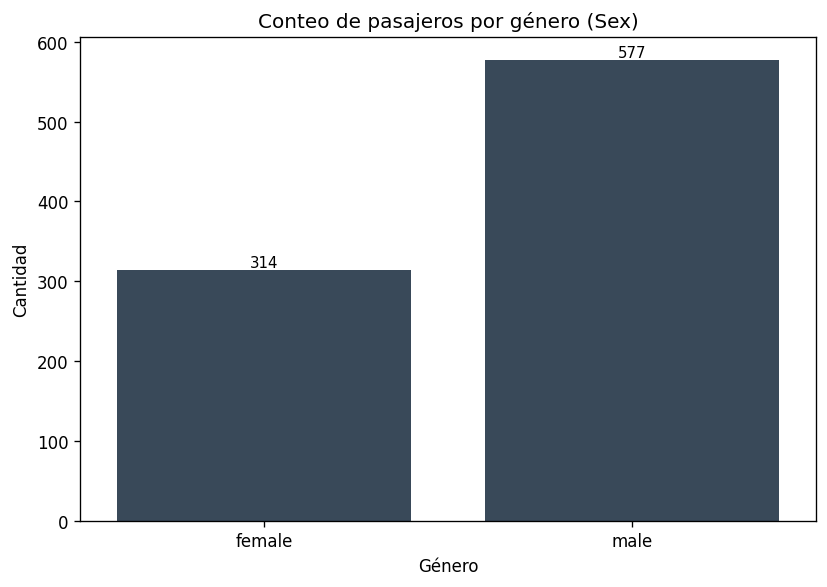

In [21]:
plt.figure(figsize=(7,5), dpi=120)
ax = sns.countplot(data=df, x='Sex', order=['female','male'], color='#34495E')

ax.set_title('Conteo de pasajeros por género (Sex)')
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(['female', 'male'])

# Anotar valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [22]:
age = df['Age'].dropna()
edad_min = age.min()
edad_max = age.max()
print(f"Edad mínima: {edad_min:.1f}")
print(f"Edad máxima: {edad_max:.1f}")


Edad mínima: 0.4
Edad máxima: 80.0


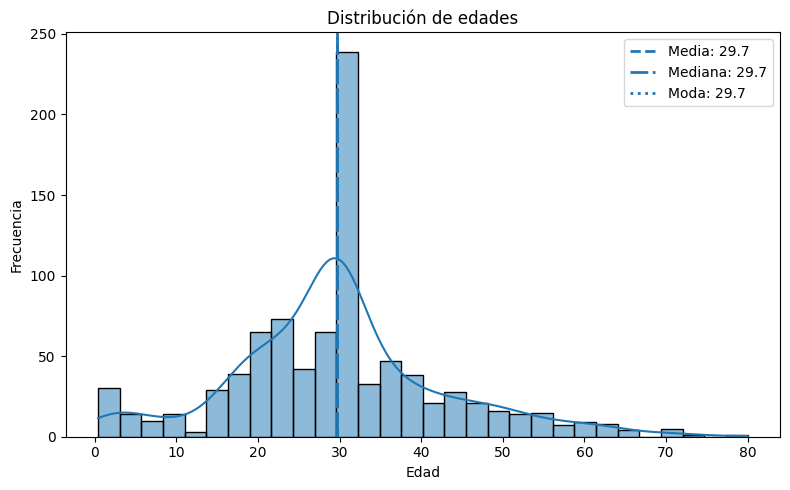

In [23]:
age = df['Age'].dropna()
mean_, median_ = age.mean(), age.median()
mode_ = age.mode().iloc[0] if not age.mode().empty else None

plt.figure(figsize=(8,5))
sns.histplot(age, bins=30, kde=True)
plt.title('Distribución de edades')
plt.xlabel('Edad'); plt.ylabel('Frecuencia')

plt.axvline(mean_,   linestyle='--', linewidth=2, label=f"Media: {mean_:.1f}")
plt.axvline(median_, linestyle='-.', linewidth=2, label=f"Mediana: {median_:.1f}")
if mode_ is not None:
    plt.axvline(mode_,  linestyle=':',  linewidth=2, label=f"Moda: {mode_:.1f}")

plt.legend()
plt.tight_layout()
plt.show()


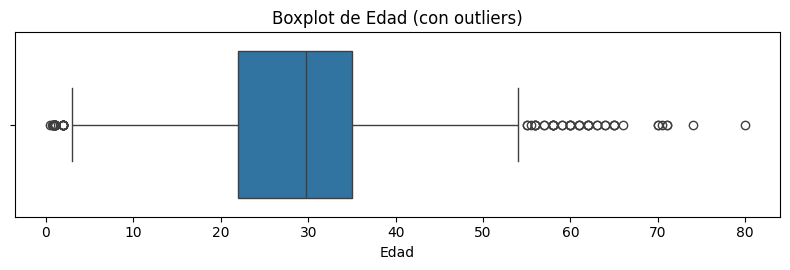

In [24]:
age = df['Age'].dropna()

plt.figure(figsize=(8,2.8))
sns.boxplot(x=age, orient='h', showfliers=True)
plt.title('Boxplot de Edad (con outliers)')
plt.xlabel('Edad')
plt.tight_layout()
plt.show()


In [25]:
fare = df['Fare'].dropna()
tarifa_min = fare.min()
tarifa_max = fare.max()
print(f"Tarifa mínima (Fare): {tarifa_min:.4f}")
print(f"Tarifa máxima (Fare): {tarifa_max:.4f}")


Tarifa mínima (Fare): 0.0000
Tarifa máxima (Fare): 512.3292


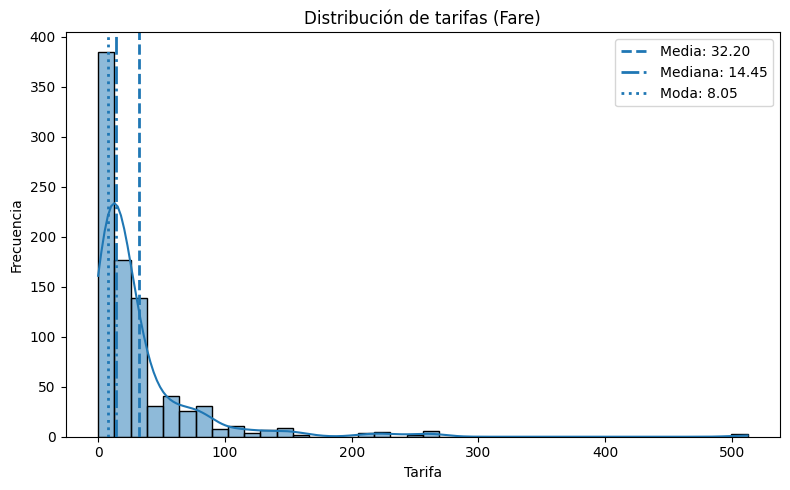

In [26]:
fare = df['Fare'].dropna()
mean_, median_ = fare.mean(), fare.median()
mode_ = fare.mode().iloc[0] if not fare.mode().empty else None

plt.figure(figsize=(8,5))
sns.histplot(fare, bins=40, kde=True)
plt.title('Distribución de tarifas (Fare)')
plt.xlabel('Tarifa'); plt.ylabel('Frecuencia')

plt.axvline(mean_,   linestyle='--', linewidth=2, label=f"Media: {mean_:.2f}")
plt.axvline(median_, linestyle='-.', linewidth=2, label=f"Mediana: {median_:.2f}")
if mode_ is not None:
    plt.axvline(mode_,  linestyle=':',  linewidth=2, label=f"Moda: {mode_:.2f}")

plt.legend()
plt.tight_layout()
plt.show()


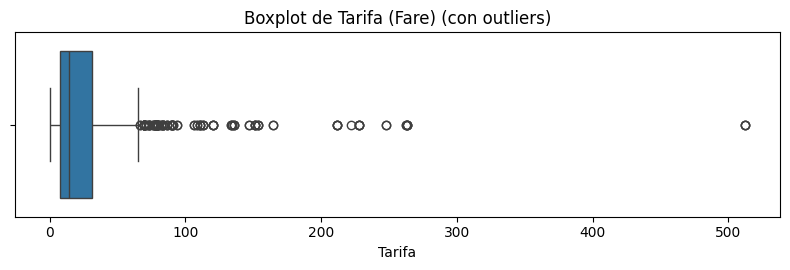

In [27]:
fare = df['Fare'].dropna()

plt.figure(figsize=(8,2.8))
sns.boxplot(x=fare, orient='h', showfliers=True)
plt.title('Boxplot de Tarifa (Fare) (con outliers)')
plt.xlabel('Tarifa')
plt.tight_layout()
plt.show()X 



In [30]:
zero_fare = df[df['Fare'] == 0]

print(f"Pasajeros con Fare == 0: {len(zero_fare)}")
zero_fare  # muestra los primeros 20; quita .head(20) para ver todos


Pasajeros con Fare == 0: 15


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.000000,0,0,0.0,S
263,0,1,male,40.000000,0,0,0.0,S
271,1,3,male,25.000000,0,0,0.0,S
277,0,2,male,29.699118,0,0,0.0,S
302,0,3,male,19.000000,0,0,0.0,S
413,0,2,male,29.699118,0,0,0.0,S
466,0,2,male,29.699118,0,0,0.0,S
481,0,2,male,29.699118,0,0,0.0,S
597,0,3,male,49.000000,0,0,0.0,S
633,0,1,male,29.699118,0,0,0.0,S


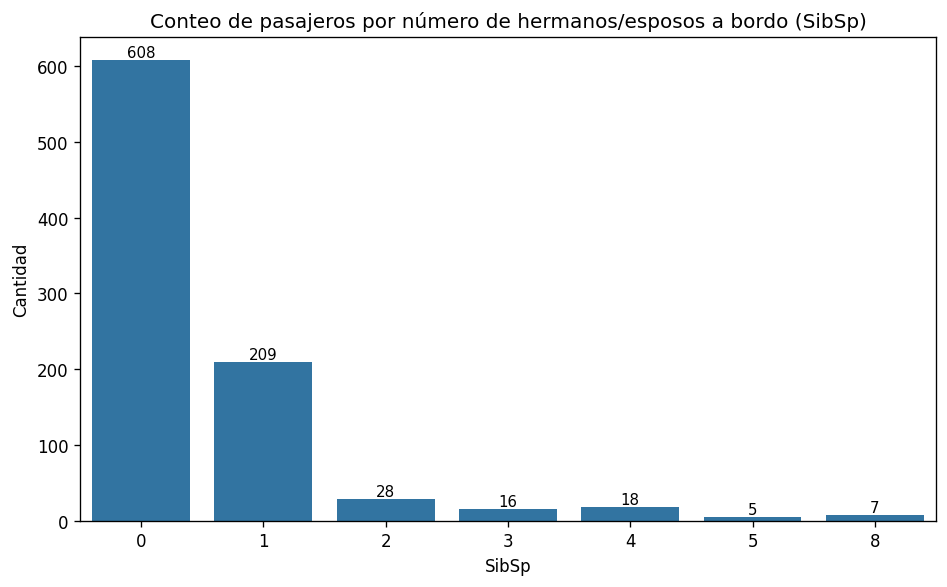

In [31]:
counts = df['SibSp'].value_counts().sort_index()

plt.figure(figsize=(8,5), dpi=120)
ax = sns.countplot(data=df, x='SibSp', order=counts.index)

ax.set_title('Conteo de pasajeros por número de hermanos/esposos a bordo (SibSp)')
ax.set_xlabel('SibSp')
ax.set_ylabel('Cantidad')

# Anotar valores sobre cada barra
for i, v in enumerate(counts.tolist()):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


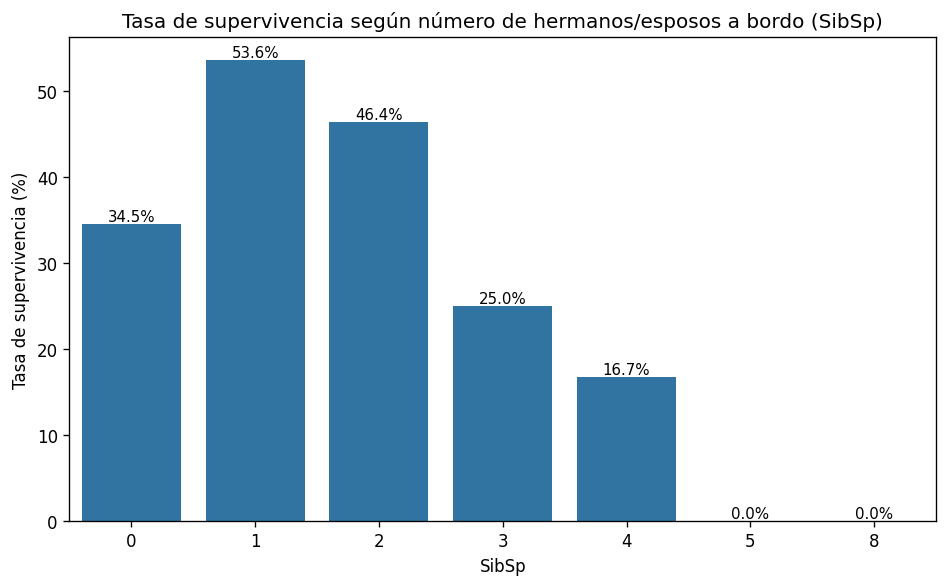

In [32]:
surv_rate = (
    df.groupby('SibSp')['Survived']
      .mean()
      .mul(100)
      .reset_index(name='TasaSupervivencia_%')
    .sort_values('SibSp')
)

plt.figure(figsize=(8,5), dpi=120)
ax = sns.barplot(data=surv_rate, x='SibSp', y='TasaSupervivencia_%')

ax.set_title('Tasa de supervivencia según número de hermanos/esposos a bordo (SibSp)')
ax.set_xlabel('SibSp')
ax.set_ylabel('Tasa de supervivencia (%)')

for p in ax.patches:
    y = p.get_height()
    ax.annotate(f'{y:.1f}%',
                (p.get_x() + p.get_width()/2, y),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [33]:
tasa = (
    df.groupby('SibSp')['Survived']
      .mean()                # proporción de 1s
      .mul(100)              # a porcentaje
      .rename('TasaSupervivencia_%')
      .round(2)
      .reset_index()
      .sort_values('SibSp')
)
tasa


,SibSp,TasaSupervivencia_%
0,0,34.54
1,1,53.59
2,2,46.43
3,3,25.00
4,4,16.67
5,5,0.00
6,8,0.00
